# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- **Name** — название игры  
- **Platform** — платформа  
- **Year_of_Release** — год выпуска  
- **Genre** — жанр игры  
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
- **EU_sales** — продажи в Европе (миллионы проданных копий)  
- **JP_sales** — продажи в Японии (миллионы проданных копий)  
- **Other_sales** — продажи в других странах (миллионы проданных копий)  
- **Critic_Score** — оценка критиков (максимум 100)  
- **User_Score** — оценка пользователей (максимум 10)  
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

## Шаг 1. Открытие файла с данными и изучение общей информации. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.Name.duplicated().sum()

5155

In [7]:
data.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
data.Year_of_Release.isnull().sum()

269

In [9]:
data[data.Year_of_Release.isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data[data.Critic_Score.isnull()].sort_values(by=max(['NA_sales','EU_sales','JP_sales']), ascending = False)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11197,Derby Stallion,SAT,1999.0,Sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN
11201,Karaoke Joysound Wii DX,Wii,2009.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN
11202,Sloane to MacHale no Nazo no Monogatari 2,DS,2009.0,Puzzle,0.00,0.00,0.09,0.00,NaN,NaN,NaN
11205,Tabi no Yubisashi Kaiwachou DS: DS Series 4 Am...,DS,2006.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN


In [11]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
data[pd.isnull(data.Genre)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data.query('Platform == "GEN"').head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [16]:
data.duplicated().sum()

0

### Вывод:
- _**Year_of_Release**_ следует привести к целочисленному типу.
- В _**Year_of_Release**_ 269 пустых значений - можно попробовать заменить Year_of_Release на значения Year_of_Release, где Name совпадает.
- _**User_Score**_ надо привести к типу float, так как это рейтинг.
- _**User_Score**_ переправить 'tbd' на на nan, что означает To Be Determined (будут определены). Но нам все равно не догадаться, как будут определены, поэтому пусть будут nan.
- _**Critic_Score**_ , _**User_Score**_ , _**Rating**_ - огромное количество nan, однако удалять тут ничего нельзя, как и заменять, ибо это будет смещенное мнение, не мнение определенных пользователей. Оставим так. Причина, скорее всего, в следующем - либо игры не особо популярны (продажи низкие, поэтому не критикует никто, рейтингов нет, либо высокие продажи, но игры старые - уже нет смысла в рейтингах, ибо все их и так знают.
- Есть 2 nun в _**Genre**_ и  _**Name**_ те же строчки, однако удалять их не буду, так как в дальнейшем нужно будет подсчитывать продажи по платформам, эти цифры важны.
- Дубликатов нет.

## Шаг 2. Подготовка данных

1) Переведем _**Year_of_Release**_ к целочисленному типу, так как речь идет все-таки о годах.

In [17]:
data['Year_of_Release'] = data['Year_of_Release'].astype('Int64')

2) Заменим _**Year_of_Release**_ , что nun на значения _**Year_of_Release**_ , где Name совпадает c Name (где _**Year_of_Release**_ - nan)

In [18]:
data['Year_of_Release'].isnull().sum()

269

In [19]:
for i in data[data['Year_of_Release'].isnull() == True].index:  
    data['Year_of_Release'][i] = data.loc[data['Name'] == data['Name'][i], 'Year_of_Release'].max()

In [20]:
data['Year_of_Release'].isnull().sum()

146

3) Переправим 'tbd' на nan для удобства дальнейшей работы, tbd означает To Be Determined (будут определены). Но нам все равно не догадаться, как будут определены, поэтому пусть будут nan. И сразу переведем _**User_Score**_ к типу float, так как речь идет о рейтинге.

In [21]:
data['User_Score'] = data['User_Score'].replace('tbd', np.nan).astype(float)

In [22]:
data['User_Score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

4) Посмотрим еще раз на рейтинги, где nun.

In [23]:
data[data.Critic_Score.isnull()].sort_values(by=(['NA_sales','EU_sales','JP_sales']), ascending = False)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.00,0.00,0.00,0.18,NaN,NaN,E
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
data[data.Critic_Score.isnull()].sort_values(by=max(['NA_sales','EU_sales','JP_sales']), ascending = False).shape

(8578, 11)

In [24]:
data[data.Critic_Score.isnull() & data.User_Score.isnull()].sort_values(by=max(['NA_sales','EU_sales','JP_sales']), ascending = False).shape

(8005, 11)

In [25]:
data[data.Critic_Score.isnull() & data.User_Score.isnull() & data.Rating.isnull()].sort_values(by=max(['NA_sales','EU_sales','JP_sales']), ascending = False).shape

(6667, 11)

5) Заменим названия столбцов (приведем к нижнему регистру)


In [26]:
data.columns=data.columns.str.lower()

In [27]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


6) Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец _**total_sales**_.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод:

- _**Year_of_Release**_ привели к целочисленному типу.
- В _**Year_of_Release**_ 269 пустых значений было, заменили часть Year_of_Release nun на значения Year_of_Release, где Name совпадает c Name, где значения Year_of_Release не пустые - стало 144 пустых значений.
- _**User_Score**_ привели к типу float, так как это рейтинг.
- _**User_Score**_ переправили 'tbd' на на nan (означает To Be Determined - будут определены). Но нам все равно не догадаться, как будут определены, поэтому пусть будут nan.
- _**Critic_Score**_ , _**User_Score**_ , _**Rating**_ - огромное количество nan, однако удалять тут ничего нельзя, как и заменять, ибо это будет смещенное мнение, не мнение определенных пользователей. Оставим так. Причина, скорее всего, в следующем - либо игры не особо популярны (продажи низкие, поэтому не критикует никто, рейтингов нет (в основном, рейтингов нет по всем 3 показателям), либо высокие продажи, но игры старые - уже нет смысла в рейтингах, ибо все их и так знают.
- Есть 2 nun в _**Genre**_ и  _**Name**_ те же строчки, однако удалять их не стали, так как в дальнейшем нужно будет подсчитывать продажи по платформам, эти цифры важны. Причины - скорее всего человеческий фактор (не вбили название игры, что весьма странно).
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.
- Дубликатов нет.

## Шаг 3. Исследовательский анализ данных.

1) Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [30]:
games_count = data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').reset_index()

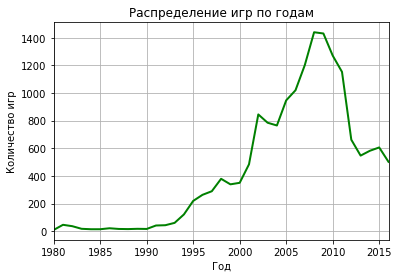

In [31]:
games_count.plot(x='year_of_release', y='name', color='green', linestyle='-',
     linewidth=2, grid=True, legend = False)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Распределение игр по годам')
plt.show()

In [32]:
games_count.loc[games_count['name'] == games_count.name.max()]

,year_of_release,name
28,2008,1440


- Из графика видно, что количество игр начало расти с 90х годов до 2008 года. 
- С 2008 года наблюдается спад.

2) Посмотрим, как менялись продажи по платформам за все года. 

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


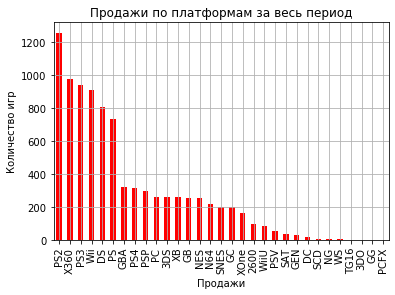

In [34]:
platform_for_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
platform_for_sales.plot(kind='bar', x='platform', y='total_sales', grid=True, legend = False, color='r')
plt.xlabel('Продажи')
plt.ylabel('Количество игр')
plt.title('Продажи по платформам за весь период')
plt.show()

In [35]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [36]:
platform_top_10_total = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 
'PS', 'GBA', 'PS4', 'PSP', 'PC']

- **Cамые популярные игровые платформы за весь период (Top-10) - PS2, X360, PS3, WII, DS, PS, GBA, PS4, PSP, PC.**

Посмотрим, что с продажами на этих платформах по годам.

In [37]:
pivot_platform = data.loc[data['platform'].isin(platform_top_10_total)&(data.year_of_release >= 1990)].pivot_table(index=['platform','year_of_release'], 
values='total_sales', aggfunc='sum').reset_index().sort_values('total_sales', ascending=False)
pivot_platform.head(5)

,platform,year_of_release,total_sales
56,PS2,2004,211.81
54,PS2,2002,208.36
95,Wii,2009,206.97
55,PS2,2003,193.05
94,Wii,2008,177.68


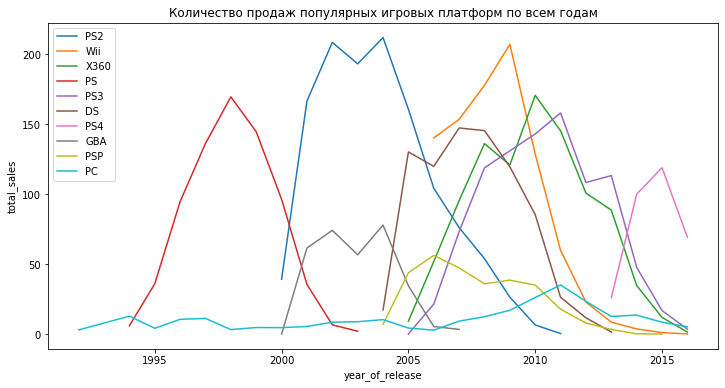

In [38]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ по всем годам')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
for i in pivot_platform['platform'].unique():
    sns.lineplot(data = pivot_platform.loc[pivot_platform['platform'] == i], x = 'year_of_release', y = 'total_sales', label=i)
    plt.legend()

In [39]:
sum_ = 0
for i in pivot_platform['platform'].unique():
    max_ = pivot_platform.loc[pivot_platform['platform'] == i]['year_of_release'].max()
    min_ = pivot_platform.loc[pivot_platform['platform'] == i]['year_of_release'].min()
    print(max_ - min_ + 1, i)
    sum_ += max_ - min_ + 1
print(sum_/10, 'среднее')

12 PS2
11 Wii
12 X360
10 PS
12 PS3
10 DS
4 PS4
8 GBA
12 PSP
25 PC
11.6 среднее


**Примерный период появления и исчезновения платформ - 12 лет** (округлим).

Исходя из полученной информации о примерном существовании платформ, я бы взяла период с 2005 года для дальнейшего анализа. (2005-2017) Так как нас интересует прогноз на 2017 год, то мы должны в основном брать платформы, существующие на данный период, тем более самая ранняя дата релиза Топ-5 платформ по всем продажам - 2005 год (для 2 платформ), да и по графикам наблюдается скопление дат релиза ряда существующих на 2016 год платформ около 2005 года.  

In [40]:
data.loc[data['year_of_release']>=2005].pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
13,X360,966.61
7,PS3,935.19
11,Wii,903.31
2,DS,786.99
6,PS2,428.34
8,PS4,314.14
9,PSP,286.51
0,3DS,258.53
5,PC,170.84
15,XOne,159.32


In [41]:
platform_top_10_2005 =['X360','PS3','Wii','DS','PS2','PS4','PSP','3DS','PC','XOne']
platform_top_10_2005

['X360', 'PS3', 'Wii', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'PC', 'XOne']

In [42]:
platform_top_10_total

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [43]:
l=[]
for i in platform_top_10_total:
    for j in platform_top_10_2005:
        if i == j:
            l.append(i)
print(l)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC']


In [44]:
data.loc[(data['year_of_release']>=2005)&(data.platform.isin(l))].pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
7,X360,966.61
3,PS3,935.19
6,Wii,903.31
0,DS,786.99
2,PS2,428.34
4,PS4,314.14
5,PSP,286.51
1,PC,170.84


Платформы, что сходятся по лидерам по продажам с 2005 года и в целом оставим для дальнейшего анализа. (Из анализа исключены PS и GBA - они в любом случае не актуальны для анализа, так как GBA перестал выпускать игры еще до 2008 года, а PS до 2005 года.

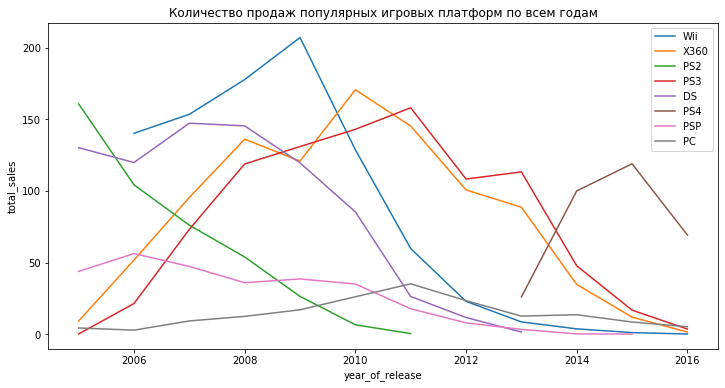

In [45]:
pivot_platform = data.loc[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC'])&(data.year_of_release >= 2005)].pivot_table(index=['platform','year_of_release'], 
values='total_sales', aggfunc='sum').reset_index().sort_values('total_sales', ascending=False)
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ по всем годам')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
for i in pivot_platform['platform'].unique():
    sns.lineplot(data = pivot_platform.loc[pivot_platform['platform'] == i], x = 'year_of_release', y = 'total_sales', label=i)
    plt.legend()

- Среднее время существования платформы - 12 лет.
- Для дальнейшего анализа возьмем данные по ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC'] с 2005 года.
- Лидерами суммарным по продажам с 2005 года являет X360. Дальше - PS3 и Wii. Однако, как видно, к 2006 продажи по платформам очень понизились, когда основные пики по рассмотренным платформам были в 2008-2001 годах (по одно платформе в 2015 году). Видимо, видеоигры все менее популярны.

3) Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [46]:
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC']

In [47]:
data_selected = data.loc[data.platform.isin(selected_platforms)]

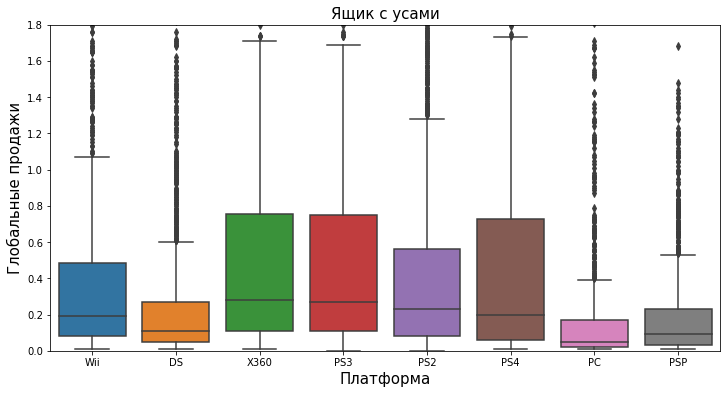

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_selected, x='platform', y='total_sales')
plt.ylim(0, 1.8)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.show()

- Медиана у всех платформ разная. Наибольшая X360 и PS3, затем у PS2. 
- У X36, PS3 и PS4 платформ 75% продаж по годам лежат до 0.75 миллионов копий.
- Самый высокий 25% квартиль у X36, PS3 и PS2.

4) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Рассмотрим платформу X360.

In [49]:
data_selected.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [50]:
platform_X360 = data_selected[data_selected['platform']=='X360']

In [51]:
print(platform_X360['user_score'].corr(platform_X360['total_sales']),'- Корреляция между продажами и оценкой пользователей')
print(platform_X360['critic_score'].corr(platform_X360['total_sales']),'- Корреляция между продажами и оценкой критиков')

0.11445882978454185 - Корреляция между продажами и оценкой пользователей
0.3937358653072588 - Корреляция между продажами и оценкой критиков


- Прямая положительная связь между продажами и оценкой критиков больше и значительнее, чем положительная связь между продажами и критикой пользователей.

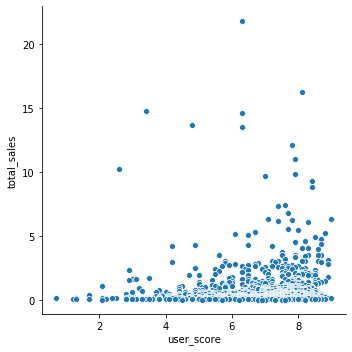

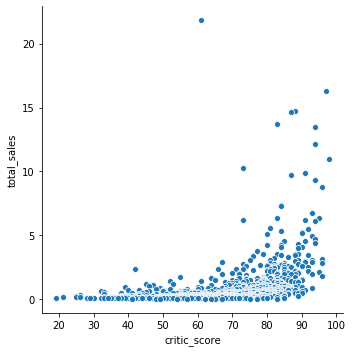

In [52]:
for i in ['user_score', 'critic_score']:
    sns.relplot(x=i, y="total_sales",data=platform_X360)    

- Прямая положительная связь между продажами и оценкой критиков значительная, тогда как положительная связь между продажами и критикой пользователей присутствует, однако небольшая.

5) Соотнесем выводы с продажами игр на других платформах.

Начнем анализ с диаграмм рассеивания между отзывами пользователей всех рассматриваемых платформ и продажами.

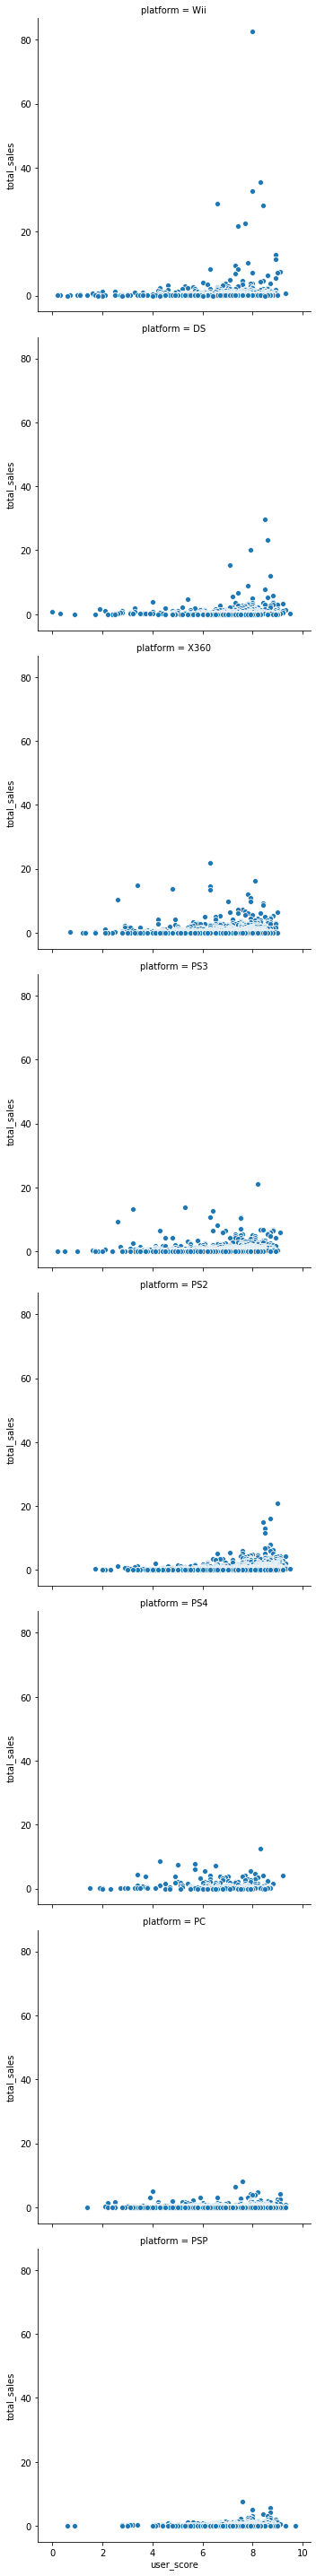

In [53]:
sns.relplot(x='user_score',
            y="total_sales",
            data=data_selected,
            kind='scatter',
            row='platform')
plt.show()

Продолжим диаграммами рассеивания между отзывами критиков всех рассматриваемых платформ и продажами.

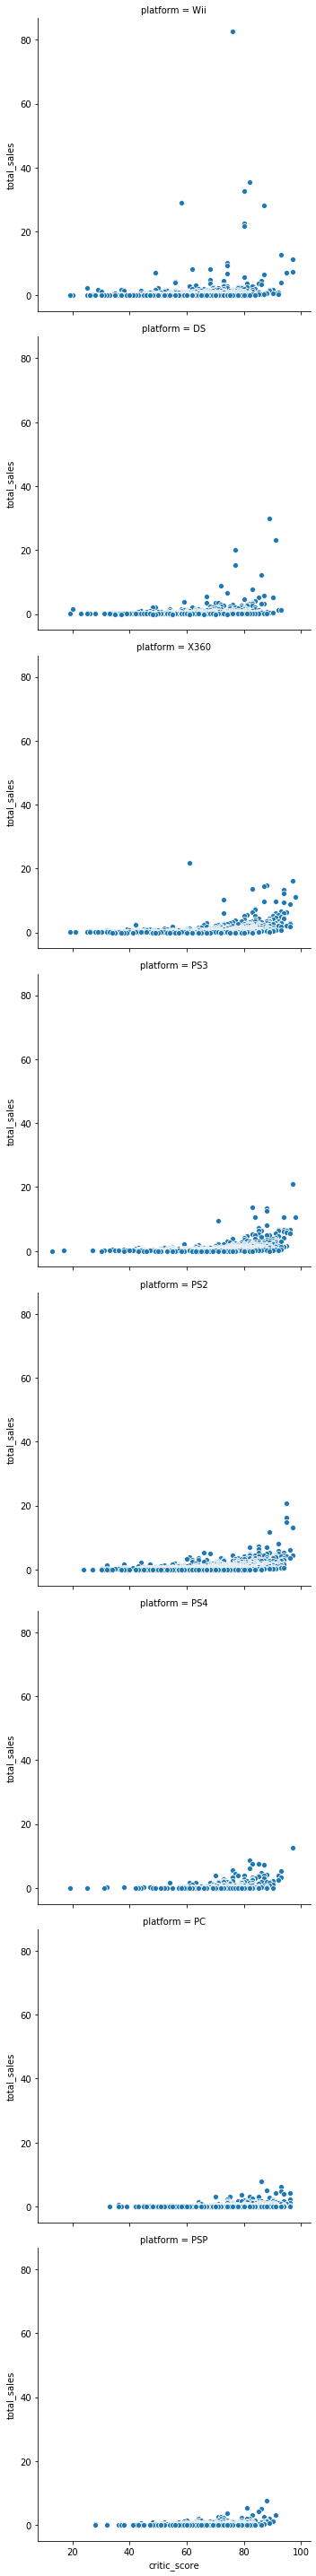

In [54]:
sns.relplot(x='critic_score',
            y="total_sales",
            data=data_selected,
            kind='scatter',
            palette='crest',
            row='platform')
plt.show()

In [55]:
for i in selected_platforms:
    print(data_selected[data_selected['platform']==i]['user_score'].corr(data_selected[data_selected['platform']==i]['total_sales']),'- Корреляция между продажами и оценкой пользователей платформы {}'.format(i))
    print(data_selected[data_selected['platform']==i]['critic_score'].corr(data_selected[data_selected['platform']==i]['total_sales']),'- Корреляция между продажами и оценкой критиков платформы {}'.format(i))
    print('')

0.17286551112058213 - Корреляция между продажами и оценкой пользователей платформы PS2
0.39543454945454876 - Корреляция между продажами и оценкой критиков платформы PS2

0.11445882978454185 - Корреляция между продажами и оценкой пользователей платформы X360
0.3937358653072588 - Корреляция между продажами и оценкой критиков платформы X360

0.12669133936341712 - Корреляция между продажами и оценкой пользователей платформы PS3
0.4324315685642061 - Корреляция между продажами и оценкой критиков платформы PS3

0.11241436067003169 - Корреляция между продажами и оценкой пользователей платформы Wii
0.17755988806089948 - Корреляция между продажами и оценкой критиков платформы Wii

0.1304355011164249 - Корреляция между продажами и оценкой пользователей платформы DS
0.23637945738859747 - Корреляция между продажами и оценкой критиков платформы DS

-0.031957110204556424 - Корреляция между продажами и оценкой пользователей платформы PS4
0.40656790206178095 - Корреляция между продажами и оценкой крити

In [56]:
data_corr = {'Платформа':  ['PS2', 'X360', 'PS3','Wii', 'DS', 'PS4', 'PSP', 'PC'],
        'Корреляция между продажами и оценкой пользователей платформы':  [0.17, 0.11, 0.13, 0.11, 0.13,-0.03,0.22,0.01],
        'Корреляция между продажами и оценкой критиков платформы': [0.4, 0.39, 0.43, 0.18,0.24,0.4,0.32,0.26]
        }
pd.DataFrame (data_corr)

,Платформа,Корреляция между продажами и оценкой пользователей платформы,Корреляция между продажами и оценкой критиков платформы
0,PS2,0.17,0.40
1,X360,0.11,0.39
2,PS3,0.13,0.43
3,Wii,0.11,0.18
4,DS,0.13,0.24
5,PS4,-0.03,0.40
6,PSP,0.22,0.32
7,PC,0.01,0.26


- В целом, следует сделать вывод, что присутствует сильная положительная связь между продажами и оценками критиков, т.е. отзывы критиков действительно влияют положительно на продажи.
- Сильной положительной связи между продажами и оценкой пользователей не наблюдается.

6) Посмотрим на общее распределение игр по жанрам. 

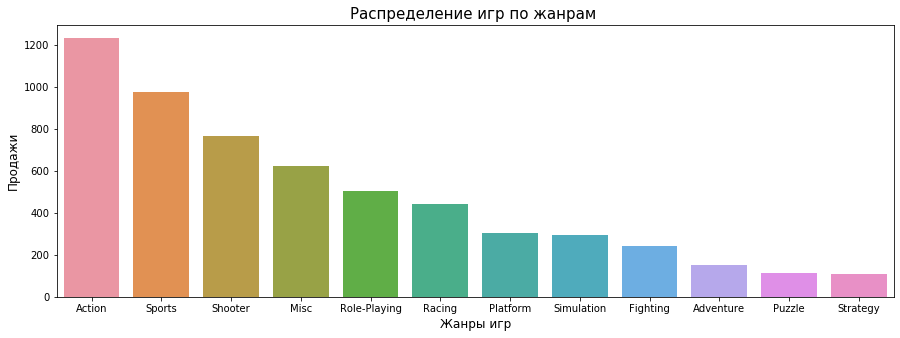

In [57]:
genre = data_selected.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=genre, x='genre', y='total_sales')
plt.title('Распределение игр по жанрам ',fontsize=15)
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

- Как видно, Топ-3 - это жанры Action, Sports и Shooter. Наиболее низкие продажи у Puzzle и Strategy.

###  Вывод:  
- Количество игр начало расти с 90х годов до 2008 года. С 2008 года наблюдается спад.
- Самые популярные игровые платформы за весь период (Top-10) - PS2, X360, PS3, WII, DS, PS, GBA, PS4, PSP, PC.
- Средний период появления и исчезновения платформ - 12 лет (с округлением).
- Исходя из полученной информации о примерном существовании платформ, был взят период для рассмотрения с 2005 года.
- Лидерами суммарным по продажам с 2005 года являет X360. Дальше - PS3 и Wii. Однако, как видно, к 2006 продажи по платформам очень понизились, когда основные пики по рассмотренным платформам были в 2008-2001 годах (по одно платформе в 2015 году). Видимо, видеоигры все менее популярны.
- Медиана у всех платформ разная. Наибольшая X360 и PS3, затем у PS2.
- У X36, PS3 и PS4 платформ 75% продаж по годам лежат до 0.75 миллионов копий.
- Самый высокий 25% квартиль у X36, PS3 и PS2.
- В целом, следует сделать вывод, что присутствует сильная положительная связь между продажами и оценками критиков, т.е. отзывы критиков действительно влияют положительно на продажи.
- Сильной положительной связи между продажами и оценкой пользователей не наблюдается.
- Топ-3 - это жанры Action, Sports и Shooter. Наиболее низкие продажи у Puzzle и Strategy.


## Шаг 4. Составим портрет пользователя каждого региона


1) Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [58]:
data_selected.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


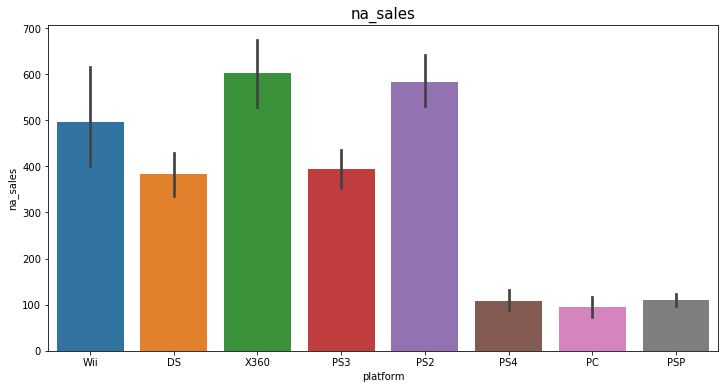

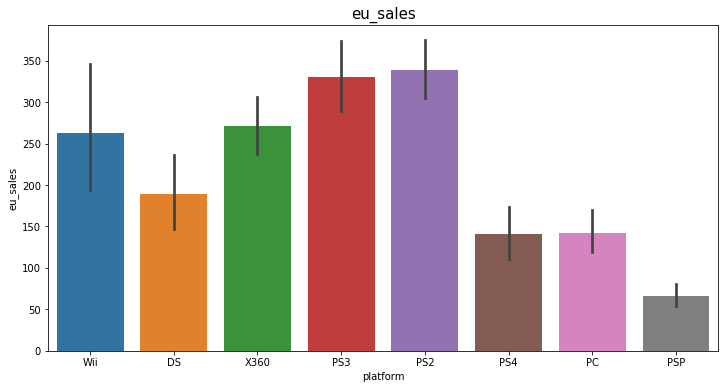

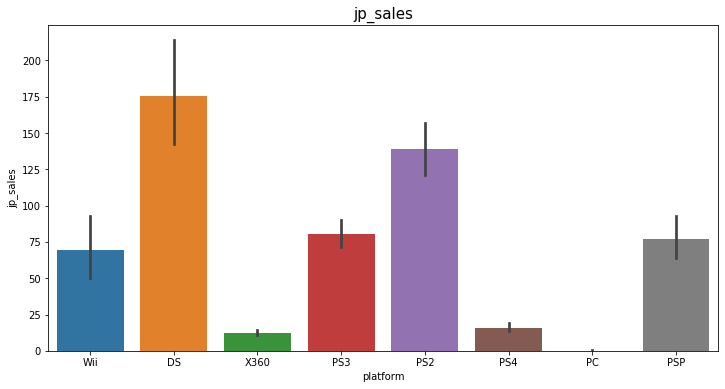

In [59]:
for i in ['na_sales','eu_sales', 'jp_sales']:
    plt.figure(figsize=(12,6))
    plt.title(i,fontsize=15)
    sns.barplot(x = 'platform', y = i, data = data_selected, estimator=sum)
    plt.show()

- Для NA (North America) Топ-5 платформ по суммарным продажам: X360, PS2, Wii, PS3, DS
- Для EU (European Union) Топ-5 платформ по суммарным продажам: PS2, PS3, X360, Wii, DS
- Для JP (Japan) Топ-5 платформ по суммарным продажам: DS, PS2, PS3, PSP, Wii  
DS в Японии - Топ-1, тогда как в NA и EU DS на последнем месте по продажам. Топ-5 входящих платформ одинаковый.

2) Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясним разницу.

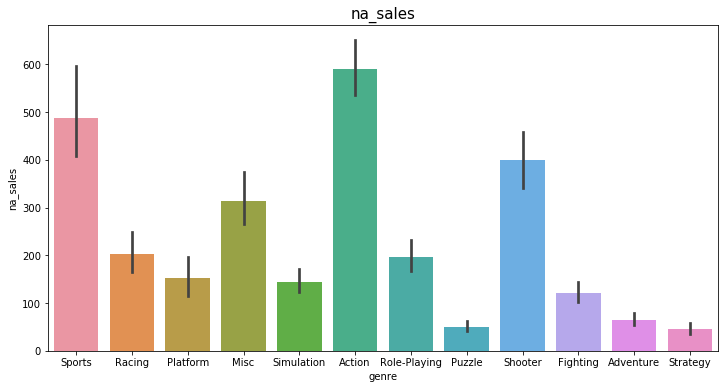

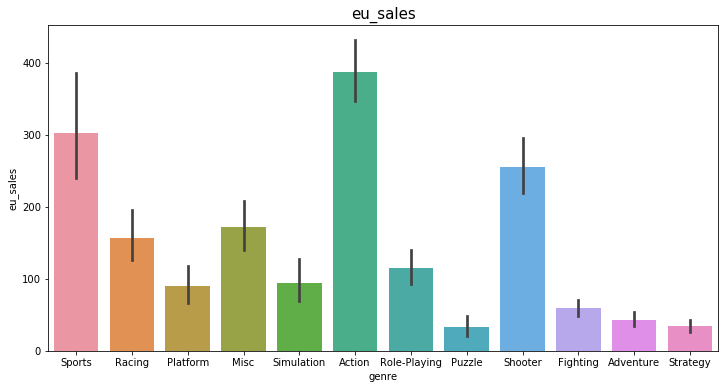

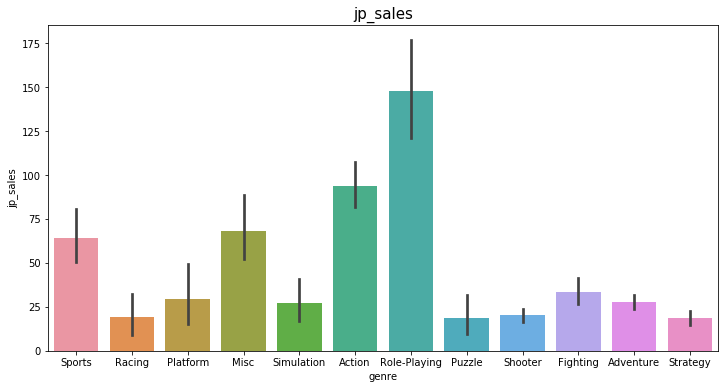

In [60]:
for i in ['na_sales','eu_sales', 'jp_sales']:
    plt.figure(figsize=(12,6))
    plt.title(i,fontsize=15)
    sns.barplot(x = 'genre', y = i, data = data_selected, estimator = sum)
    plt.show()

- Для North America Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для European Union Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для Japan Топ-5 по суммарным продажам: Role-Playing, Action, Misc, Sports, Fighting  
Предпочтения по жанрам игр японцев  отличаются от предпочтений европейцев и американцев (у европейцев и американцев предпочтения одинаковые).Role-Playing у японцев самые продаваемые игры, тогда как у американцев и европейцев role-playing в Топ-5 не входит.

3) Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?


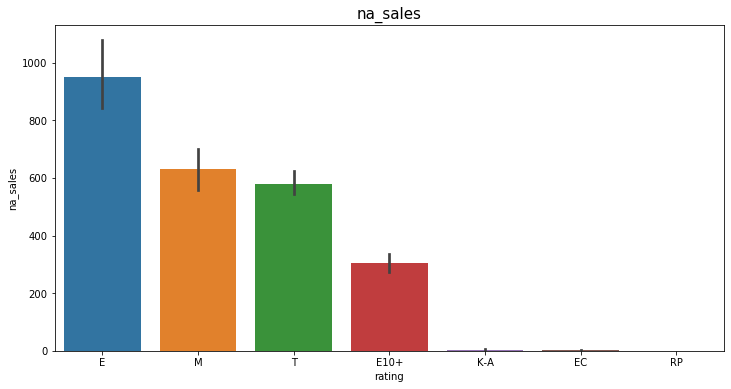

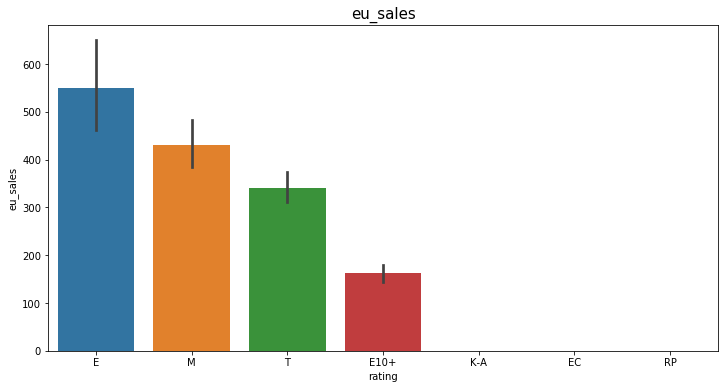

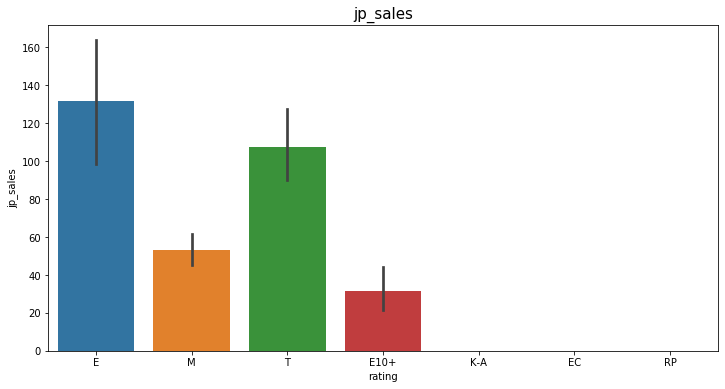

In [61]:
for i in ['na_sales','eu_sales', 'jp_sales']:
    plt.figure(figsize=(12,6))
    plt.title(i,fontsize=15)
    sns.barplot(data=data_selected, x='rating', y=i, estimator=sum)
    plt.show()

- В North America в среднем лучше всего продаются "E" (" Для всех"), затем в среднем продажи сильно падают для "М" ("Для взрослых"), "T" ("Подросткам")
- В Europen Union "E" (" Для всех"), "M" ("Для взрослых"), "T" ("Подросткам")
-  В Japan  "E" (" Для всех"), "T" ("Подросткам"), "M" ("Для взрослых")  
В целом рейтинг на суммарные продажи влияет для всех стран примерно одинаково.


## Вывод: 
- Для NA (North America) Топ-5 платформ по суммарным продажам: X360, PS2, Wii, PS3, DS
- Для EU (European Union) Топ-5 платформ по суммарным продажам: PS2, PS3, X360, Wii, DS
- Для JP (Japan) Топ-5 платформ по суммарным продажам: DS, PS2, PS3, PSP, Wii 

DS в Японии - Топ-1, тогда как в NA и EU DS на последнем месте по продажам. Топ-5 входящих платформ одинаковый.

- Для North America Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для European Union Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для Japan Топ-5 по суммарным продажам: Role-Playing, Action, Misc, Sports, Fighting 

Предпочтения по жанрам игр японцев  отличаются от предпочтений европейцев и американцев (у европейцев и американцев предпочтения одинаковые).Role-Playing у японцев самые продаваемые игры, тогда как у американцев и европейцев role-playing в Топ-5 не входит. 

- В North America в среднем лучше всего продаются "E" (" Для всех"), затем в среднем продажи сильно падают для "М" ("Для взрослых"), "T" ("Подросткам")
- В Europen Union "E" (" Для всех"), "M" ("Для взрослых"), "T" ("Подросткам")
-  В Japan  "E" (" Для всех"), "T" ("Подросткам"), "M" ("Для взрослых")  

В целом рейтинг на суммарные продажи влияет для всех стран примерно одинаково.





## Шаг 5. Проверка гипотез


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  

Сформулируем гипотезу:  
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза H₁: Иначе

In [62]:
data_selected.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77


In [63]:
x360 = data_selected.loc[data_selected['platform']=='X360']['user_score']
pc = data_selected.loc[data_selected['platform']=='PC']['user_score']

In [64]:
x360.var()

2.077438644482354

In [65]:
pc.var()

2.3407871413372

In [66]:
alpha = .01

results = st.ttest_ind(x360.dropna(), pc.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6386403689482862e-07
Отвергаем нулевую гипотезу


- Средние пользовательские рейтинги PC и X360 не являются одинаковыми на 1% уровне значимости.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**  

Сформулируем гипотезу:  
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
Альтернативная гипотеза H₁: Иначе

In [67]:
genre_action = data_selected.loc[data_selected['genre']=='Action']['user_score']
genre_sports = data_selected.loc[data_selected['genre']=='Sports']['user_score']

In [68]:
alpha = .01

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00010479762419472314
Отвергаем нулевую гипотезу


- Средние пользовательские рейтинги жанров Action и Sports не являются одинаковыми на 1% уровне значимости.

### Вывод:

- Средние пользовательские рейтинги PC и X360 не являются одинаковыми на 1% уровне значимости.
- Средние пользовательские рейтинги жанров Action и Sports не являются одинаковыми на 1% уровне значимости.

## Общий вывод:

- Количество игр начало расти с 90х годов до 2008 года. С 2008 года наблюдается спад.
- Самые популярные игровые платформы за весь период (Top-10) - PS2, X360, PS3, WII, DS, PS, GBA, PS4, PSP, PC.
- Средний период появления и исчезновения платформ - 12 лет (с округлением).
- Исходя из полученной информации о примерном существовании платформ, был взят период для рассмотрения с 2005 года.
- Лидерами суммарным по продажам с 2005 года являет X360. Дальше - PS3 и Wii. Однако, как видно, к 2006 продажи по платформам очень понизились, когда основные пики по рассмотренным платформам были в 2008-2001 годах (по одно платформе в 2015 году). Видимо, видеоигры все менее популярны.
- Медиана у всех платформ разная. Наибольшая X360 и PS3, затем у PS2.
- У X36, PS3 и PS4 платформ 75% продаж по годам лежат до 0.75 миллионов копий.
- Самый высокий 25% квартиль у X36, PS3 и PS2.
- В целом, следует сделать вывод, что присутствует сильная положительная связь между продажами и оценками критиков, т.е. отзывы критиков действительно влияют положительно на продажи.
- Сильной положительной связи между продажами и оценкой пользователей не наблюдается.
- Топ-3 - это жанры Action, Sports и Shooter. Наиболее низкие продажи у Puzzle и Strategy.
- Для NA (North America) Топ-5 платформ по суммарным продажам: X360, PS2, Wii, PS3, DS
- Для EU (European Union) Топ-5 платформ по суммарным продажам: PS2, PS3, X360, Wii, DS
- Для JP (Japan) Топ-5 платформ по суммарным продажам: DS, PS2, PS3, PSP, Wii 

DS в Японии - Топ-1, тогда как в NA и EU DS на последнем месте по продажам. Топ-5 входящих платформ одинаковый.

- Для North America Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для European Union Топ-5 по суммарным продажам: Action, Sports, Shooter, Misc, Racing
- Для Japan Топ-5 по суммарным продажам: Role-Playing, Action, Misc, Sports, Fighting 

Предпочтения по жанрам игр японцев  отличаются от предпочтений европейцев и американцев (у европейцев и американцев предпочтения одинаковые).Role-Playing у японцев самые продаваемые игры, тогда как у американцев и европейцев role-playing в Топ-5 не входит. 

- В North America в среднем лучше всего продаются "E" (" Для всех"), затем в среднем продажи сильно падают для "М" ("Для взрослых"), "T" ("Подросткам")
- В Europen Union "E" (" Для всех"), "M" ("Для взрослых"), "T" ("Подросткам")
-  В Japan  "E" (" Для всех"), "T" ("Подросткам"), "M" ("Для взрослых")  

В целом рейтинг на суммарные продажи влияет для всех стран примерно одинаково.

- Средние пользовательские рейтинги PC и X360 не являются одинаковыми на 1% уровне значимости.
- Средние пользовательские рейтинги жанров Action и Sports не являются одинаковыми на 1% уровне значимости.